### 1. Data Visualization

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head(10)

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


RestingBP and Cholesterol have min 0
Change values from 0 to null for those two columns
#Need to discuss how to handle them 

In [43]:
# Calculate median for 'RestingBP' and 'Cholesterol'
median_RestingBP = df['RestingBP'].median()
median_Cholesterol = df['Cholesterol'].median()

# Replace NaNs with the median
df['RestingBP'].fillna(median_RestingBP, inplace=True)
df['Cholesterol'].fillna(median_Cholesterol, inplace=True)

df.isnull().sum() / df.shape[0]

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [44]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [45]:
fig = px.pie(df, names='HeartDisease', title='Percentage for each outcome')
fig.update_layout(width=500, height=300)
fig.show()

In [46]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [47]:
df.groupby(['HeartDisease', 'Sex'])[['Age']].describe().T

HeartDisease           0                      1            
Sex                    F           M          F           M
Age count     143.000000  267.000000  50.000000  458.000000
    mean       51.202797   50.202247  56.180000   55.868996
    std         9.627981    9.344911   8.220656    8.788562
    min        30.000000   28.000000  33.000000   31.000000
    25%        44.000000   42.000000  51.000000   51.000000
    50%        51.000000   51.000000  58.000000   57.000000
    75%        57.000000   57.000000  62.000000   62.000000
    max        76.000000   75.000000  73.000000   77.000000

In [48]:
fig = px.box(df, y="Age", x="HeartDisease", points="all",  color="Sex",
             title="Distribution of age of database participants (stratified by outcome)")
fig.show()

In [49]:
fig = px.box(df, y="Age", x="HeartDisease", points="all", 
             title="Distribution of age of database participants (stratified by outcome)")

fig.show()

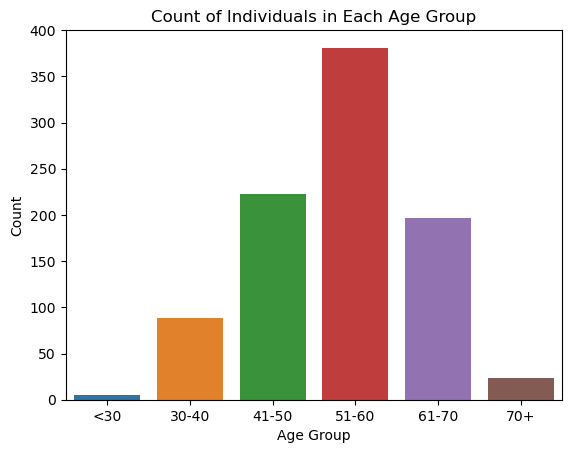

In [50]:
unique_ages = df['Age'].unique()

bins = [0, 30, 40, 50, 60, 70, float('inf')]
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '70+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(x='AgeGroup', data=df)
plt.title("Count of Individuals in Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

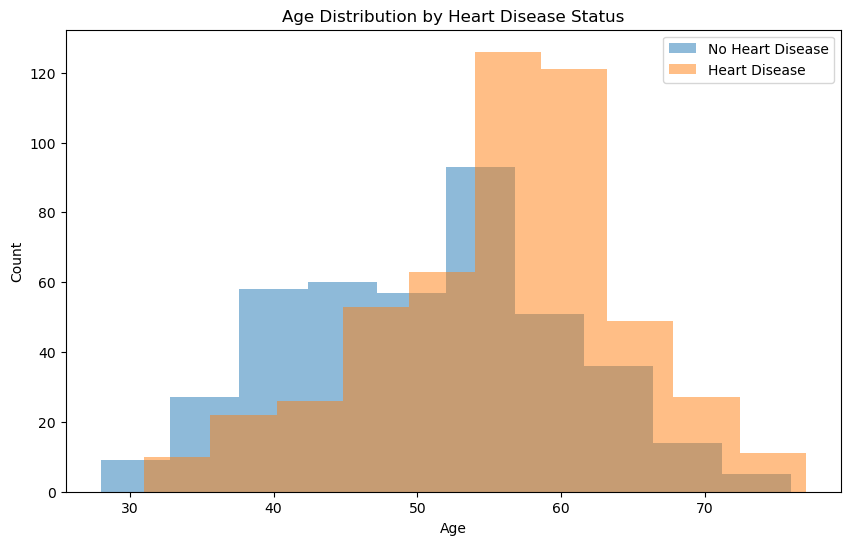

In [51]:
df_no_disease = df[df['HeartDisease'] == 0]
df_with_disease = df[df['HeartDisease'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df_no_disease['Age'], alpha=0.5, label='No Heart Disease')
plt.hist(df_with_disease['Age'], alpha=0.5, label='Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [52]:
df_copy = df.copy()
df_copy['c'] = 1
df_copy.groupby(['HeartDisease', 'Sex']).agg('count')[['c']]

c
HeartDisease Sex     
0            F    143
             M    267
1            F     50
             M    458

In [53]:
fig = px.histogram(df_copy, x="Sex", y="c",
             color='HeartDisease', barmode='group',
             title="Distribution of outcome of database participants (stratified by sex)")
fig.update_layout(width=700, height=300)

fig.show()

### 2. Data cleaning and pre-processing

#### 2.1 Data cleaning

In [54]:
X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']

sex = df.pop("Sex") # Pop function drops and assigns at the same time
df.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,41-50
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,41-50
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,51-60
5,39,NAP,120,339,0,Normal,170,N,0.0,Up,0,30-40
6,45,ATA,130,237,0,Normal,170,N,0.0,Up,0,41-50
7,54,ATA,110,208,0,Normal,142,N,0.0,Up,0,51-60
8,37,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,30-40
9,48,ATA,120,284,0,Normal,120,N,0.0,Up,0,41-50


In [55]:
numeric_features = ["Age", "RestingBP", "Cholesterol", "Oldpeak", "RestingBP", "MaxHR", "Oldpeak"]
X[numeric_features][:5]


,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,40,140,289,0.0,140,172,0.0
1,49,160,180,1.0,160,156,1.0
2,37,130,283,0.0,130,98,0.0
3,48,138,214,1.5,138,108,1.5
4,54,150,195,0.0,150,122,0.0


In [56]:
categorical_features = ["ChestPainType", "RestingECG", "ST_Slope"]
X[categorical_features][:5]

,ChestPainType,RestingECG,ST_Slope
0,ATA,Normal,Up
1,NAP,Normal,Flat
2,ATA,ST,Up
3,ASY,Normal,Flat
4,NAP,Normal,Up


In [57]:
binary_features = ["Sex", "FastingBS", "ExerciseAngina"]
X[binary_features][:5]

,Sex,FastingBS,ExerciseAngina
0,M,0,N
1,F,0,N
2,M,0,N
3,F,0,Y
4,M,0,N


In [58]:
from sklearn.preprocessing import OrdinalEncoder

binary_transformer = OrdinalEncoder()

data = binary_transformer.fit_transform(X[binary_features])
X_bin = pd.DataFrame(data, columns=binary_features)
X_bin[:5]

,Sex,FastingBS,ExerciseAngina
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [59]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
data = categorical_transformer.fit_transform(X[categorical_features]).toarray()
cols = categorical_transformer.get_feature_names_out()
X_cat = pd.DataFrame(data, columns=cols)
X_cat[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
data = X[numeric_features]
X_num = pd.DataFrame(data, columns=numeric_features)
X_num

,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,40,140,289,0.0,140,172,0.0
1,49,160,180,1.0,160,156,1.0
2,37,130,283,0.0,130,98,0.0
3,48,138,214,1.5,138,108,1.5
4,54,150,195,0.0,150,122,0.0
...,...,...,...,...,...,...,...
913,45,110,264,1.2,110,132,1.2
914,68,144,193,3.4,144,141,3.4
915,57,130,131,1.2,130,115,1.2
916,57,130,236,0.0,130,174,0.0


In [61]:
X_data = pd.concat([X_cat, X_bin, X_num], axis = 1)
X_data[:5]

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex,FastingBS,ExerciseAngina,Age,RestingBP,Cholesterol,Oldpeak,RestingBP,MaxHR,Oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,40,140,289,0.0,140,172,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49,160,180,1.0,160,156,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,37,130,283,0.0,130,98,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48,138,214,1.5,138,108,1.5
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,54,150,195,0.0,150,122,0.0


#### 2.1 Feature Scaling

### 3. Train/Test Data Split

In [62]:
from sklearn.model_selection import train_test_split

# sensitive_attributes = X_data[['Sex', 'Age']]
sensitive_attributes = X_data['Sex']

X_train, X_test, y_train, y_test, sa_train, sa_test = train_test_split(X_data, y, sensitive_attributes, test_size=0.2, random_state=42)

### 4. Model Training

RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_


y_pred = best_rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Test Accuracy: 0.8804347826086957


In [100]:
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50)

rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Confusion Matrix:
 [[67 10]
 [12 95]]
Accuracy: 0.8804347826086957


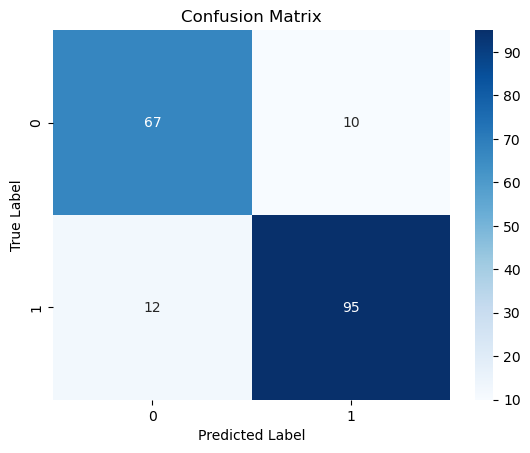

In [101]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [114]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test)

# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Overall Metrics:
 accuracy          0.880435
precision         0.904762
recall            0.887850
f1                0.896226
selection_rate    0.570652
dtype: float64

Metrics by Group:
      accuracy  precision   recall        f1  selection_rate
Sex                                                        
0.0  0.814815   0.666667  0.75000  0.705882        0.333333
1.0  0.891720   0.927083  0.89899  0.912821        0.611465

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.925469   0.736842  0.844737  0.787616        0.584127
1.0  1.012817   1.024671  1.012547  1.018516        1.071520


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



array([[<Axes: title={'center': 'accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'f1'}, xlabel='Sex'>,
        <Axes: title={'center': 'selection_rate'}, xlabel='Sex'>,
        <Axes: xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

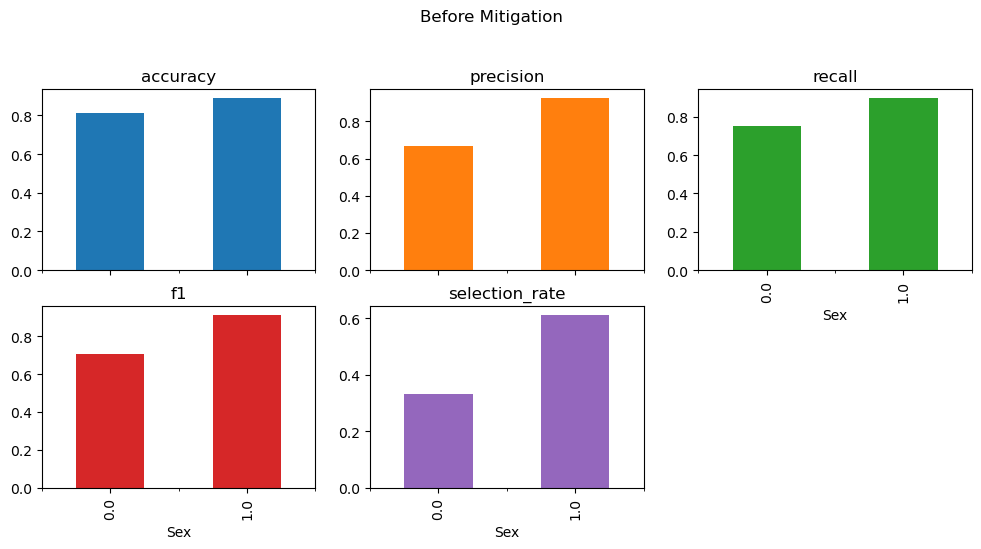

In [115]:
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_test_pred, sensitive_features=sa_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Before Mitigation",
)

In [116]:
mf.by_group

,accuracy,precision,recall,f1,selection_rate
Sex,,,,,
0.0,0.814815,0.666667,0.75000,0.705882,0.333333
1.0,0.891720,0.927083,0.89899,0.912821,0.611465


In [104]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, demographic_parity_ratio, equalized_odds_ratio

dpd = demographic_parity_difference(y_test, y_test_pred, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, y_test_pred, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, y_test_pred, sensitive_features = sa_test)
eqr = equalized_odds_ratio(y_test, y_test_pred, sensitive_features=sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))
print(f'Value of equal odds ratio: {round(eqr, 2)}')

Demographic parity difference: 0.28
Equalized odds difference: 0.15
Demographic parity ratio: 0.55
Value of equal odds ratio: 0.76


In [105]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

dp = DemographicParity()
dt_classifier_reduction = ExponentiatedGradient(rf_model, dp)

dt_classifier_reduction.fit(X_train, y_train, sensitive_features=sa_train)
prediction_dp = dt_classifier_reduction.predict(X_test)


In [106]:
dpd = demographic_parity_difference(y_test, prediction_dp, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, prediction_dp, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, prediction_dp, sensitive_features = sa_test)
eqr = equalized_odds_ratio(y_test, prediction_dp, sensitive_features=sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))
print(f'Value of equal odds ratio: {round(eqr, 2)}')

Demographic parity difference: 0.18
Equalized odds difference: 0.56
Demographic parity ratio: 0.77
Value of equal odds ratio: 0.18


In [107]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics, y_true=y_test, y_pred=prediction_dp, sensitive_features=sa_test)

# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Overall Metrics:
 accuracy          0.826087
precision         0.826087
recall            0.887850
f1                0.855856
selection_rate    0.625000
dtype: float64

Metrics by Group:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.518519   0.380952  1.000000  0.551724        0.777778
1.0  0.878981   0.925532  0.878788  0.901554        0.598726

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0   0.62768   0.461153  1.126316  0.644646        1.244444
1.0   1.06403   1.120381  0.989793  1.053395        0.957962


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



array([[<Axes: title={'center': 'accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'f1'}, xlabel='Sex'>,
        <Axes: title={'center': 'selection_rate'}, xlabel='Sex'>,
        <Axes: xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

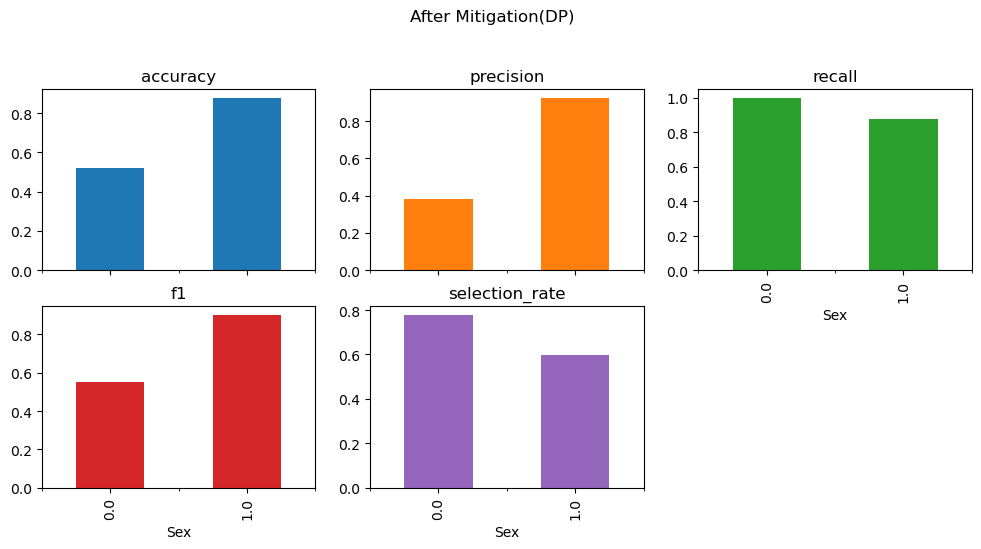

In [108]:
mf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="After Mitigation(DP)",
)

In [109]:
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds

# Use EqualizedOdds instead of DemographicParity
eo = EqualizedOdds()

# Apply ExponentiatedGradient with EqualizedOdds
eg_classifier_eo = ExponentiatedGradient(rnf_model, eo)
eg_classifier_eo.fit(X_train, y_train, sensitive_features=sa_train)
prediction_eo = eg_classifier_eo.predict(X_test)

In [110]:
dpd = demographic_parity_difference(y_test, prediction_eo, sensitive_features = sa_test)
eod = equalized_odds_difference(y_test, prediction_eo, sensitive_features = sa_test)
dpr = demographic_parity_ratio(y_test, prediction_eo, sensitive_features = sa_test)
eqr = equalized_odds_ratio(y_test, prediction_eo, sensitive_features=sa_test)

print("Demographic parity difference: {}".format(round(dpd, 2)))
print("Equalized odds difference: {}".format(round(eod, 2)))
print("Demographic parity ratio: {}".format(round(dpr, 2)))
print(f'Value of equal odds ratio: {round(eqr, 2)}')

Demographic parity difference: 0.2
Equalized odds difference: 0.09
Demographic parity ratio: 0.67
Value of equal odds ratio: 0.57


In [111]:
metrics_m = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'selection_rate': selection_rate
}

mf = MetricFrame(metrics_m, y_true=y_test, y_pred=prediction_eo, sensitive_features=sa_test)

# Output overall metrics and metrics by group
print("Overall Metrics:\n", mf.overall)
print("\nMetrics by Group:\n", mf.by_group)

# Optionally, compute and print disparities
disparities = mf.by_group / mf.overall
print("\nDisparities:\n", disparities)

Overall Metrics:
 accuracy          0.875000
precision         0.896226
recall            0.887850
f1                0.892019
selection_rate    0.576087
dtype: float64

Metrics by Group:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.814815   0.636364  0.875000  0.736842        0.407407
1.0  0.885350   0.926316  0.888889  0.907216        0.605096

Disparities:
      accuracy  precision    recall        f1  selection_rate
Sex                                                         
0.0  0.931217   0.710048  0.985526  0.826039        0.707198
1.0  1.011829   1.033573  1.001170  1.017037        1.050355


C:\Users\Yerin\anaconda3\Lib\site-packages\fairlearn\metrics\_metric_frame.py:77: FutureWarning:

You have provided 'metrics' as positional arguments. Please pass them as keyword arguments. From version 0.10.0 passing them as positional arguments will result in an error.



array([[<Axes: title={'center': 'accuracy'}, xlabel='Sex'>,
        <Axes: title={'center': 'precision'}, xlabel='Sex'>,
        <Axes: title={'center': 'recall'}, xlabel='Sex'>],
       [<Axes: title={'center': 'f1'}, xlabel='Sex'>,
        <Axes: title={'center': 'selection_rate'}, xlabel='Sex'>,
        <Axes: xlabel='Sex'>],
       [<Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>, <Axes: xlabel='Sex'>]],
      dtype=object)

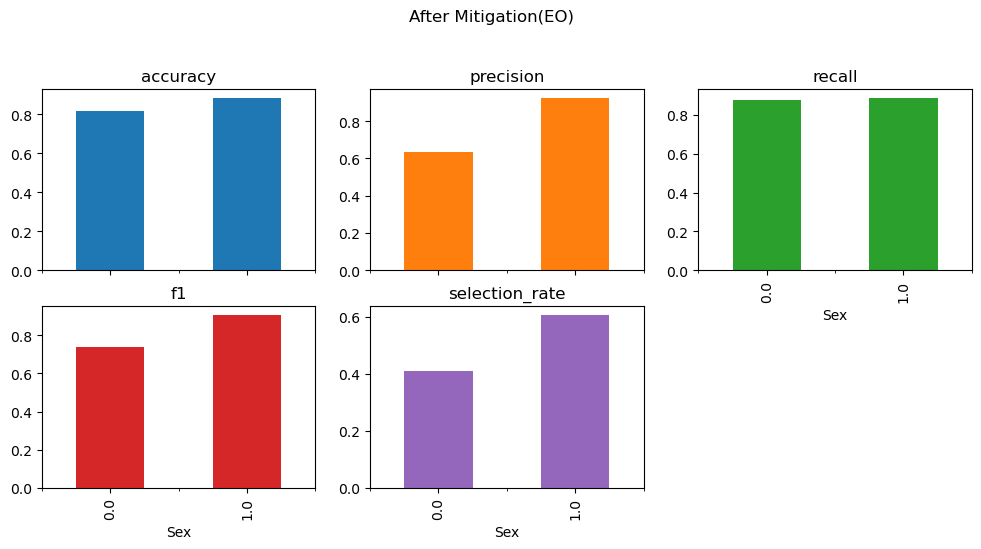

In [112]:
mf.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="After Mitigation(EO)",
)

In [113]:
mf.by_group

,accuracy,precision,recall,f1,selection_rate
Sex,,,,,
0.0,0.814815,0.636364,0.875000,0.736842,0.407407
1.0,0.885350,0.926316,0.888889,0.907216,0.605096
